### Libraries Required

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

#### Importing Data

In [4]:
calories_df=pd.read_csv("data/calories.csv")
calories_df.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [5]:
exercise_df=pd.read_csv("data/exercise.csv")
exercise_df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [6]:
df=exercise_df.merge(calories_df,on="User_ID")

In [7]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


### Data Understading

In [8]:
df.shape

(15000, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [10]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


### Data Preparation

In [11]:
#finding null value columns 
df.isnull().any()

User_ID       False
Gender        False
Age           False
Height        False
Weight        False
Duration      False
Heart_Rate    False
Body_Temp     False
Calories      False
dtype: bool

In [12]:
# Remove duplicates
df = df.drop_duplicates()

### Feature Engineering

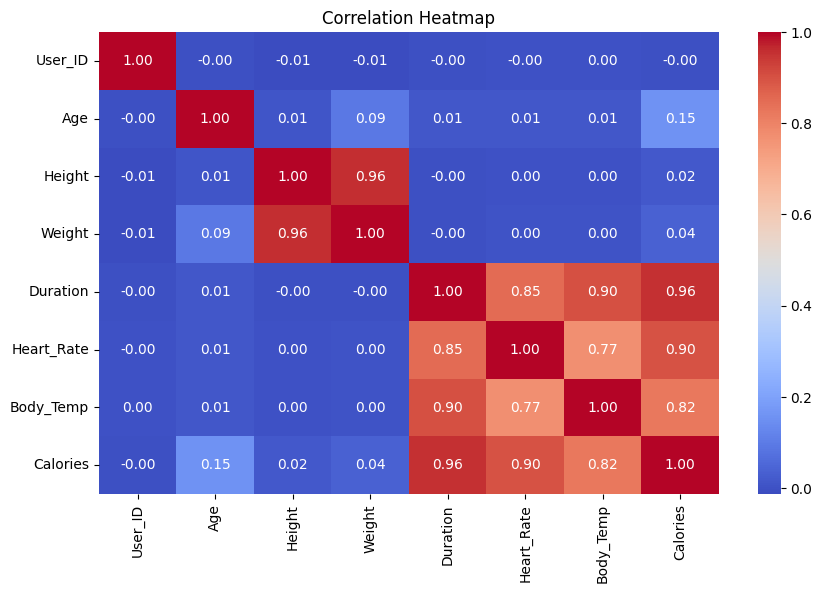

In [13]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [14]:
#removing user_id 
df=df.drop("User_ID",axis=1)


In [15]:
df['Gender'] = df['Gender'].map({'male': 0, 'female': 1})
df['Gender'].head()
                                

0    0
1    1
2    0
3    1
4    1
Name: Gender, dtype: int64

In [16]:
# BMI
df['BMI'] = df['Weight'] / ((df['Height']/100) ** 2)

In [17]:
# Workout Intensity = Avg Heart Rate per minute
df['Workout_Intensity'] = df['Heart_Rate'] / df['Duration']

In [18]:
# Temperature rise per minute
df['Temp_Rise_per_min'] = df['Body_Temp'] / df['Duration']

In [19]:
feature_df=df[["BMI","Age","Workout_Intensity",'Temp_Rise_per_min',"Calories"]]

<Axes: >

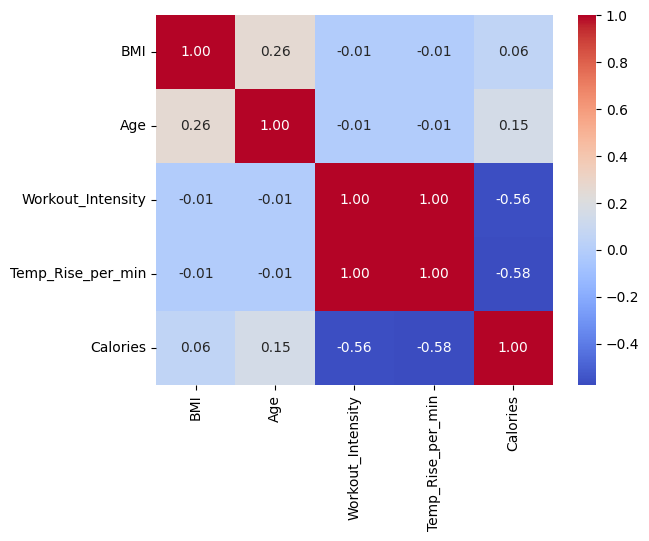

In [20]:
sns.heatmap(feature_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")

## Distribution Plots

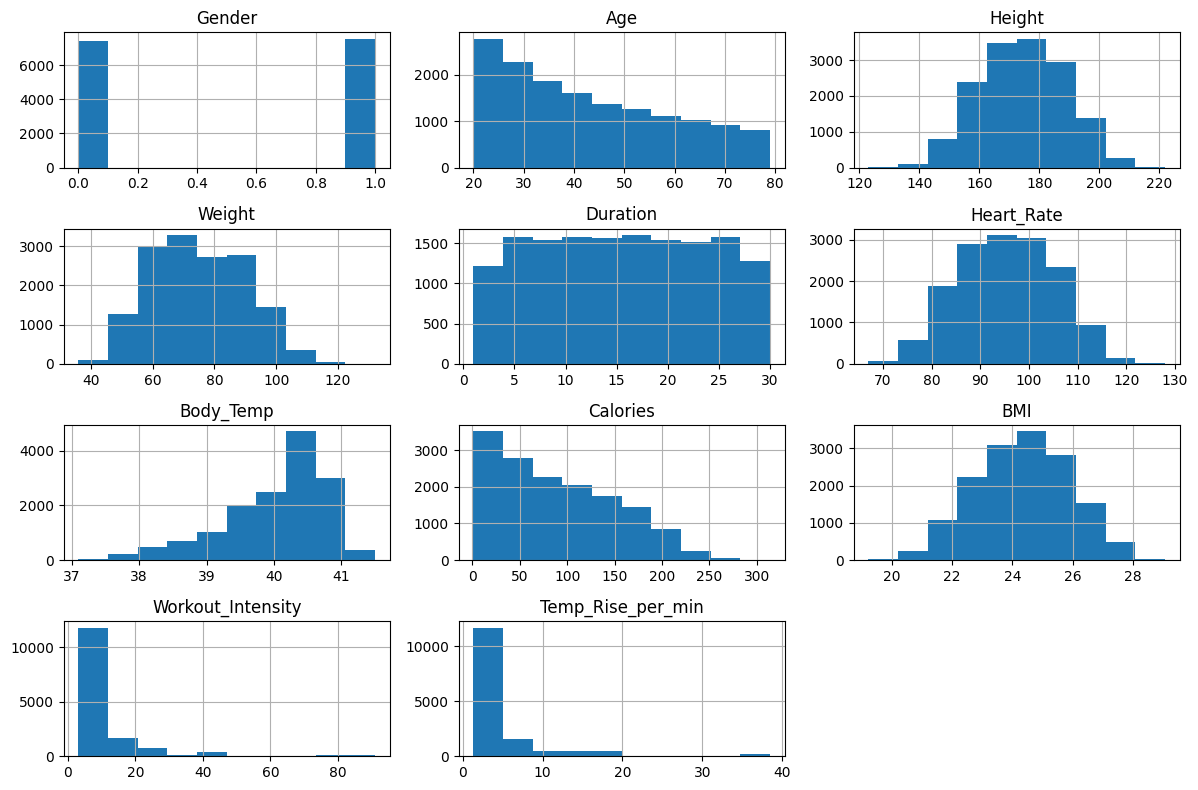

In [21]:
df.hist(figsize=(12,8))
plt.tight_layout()
plt.show()

### Outlier Detection

## Box plots

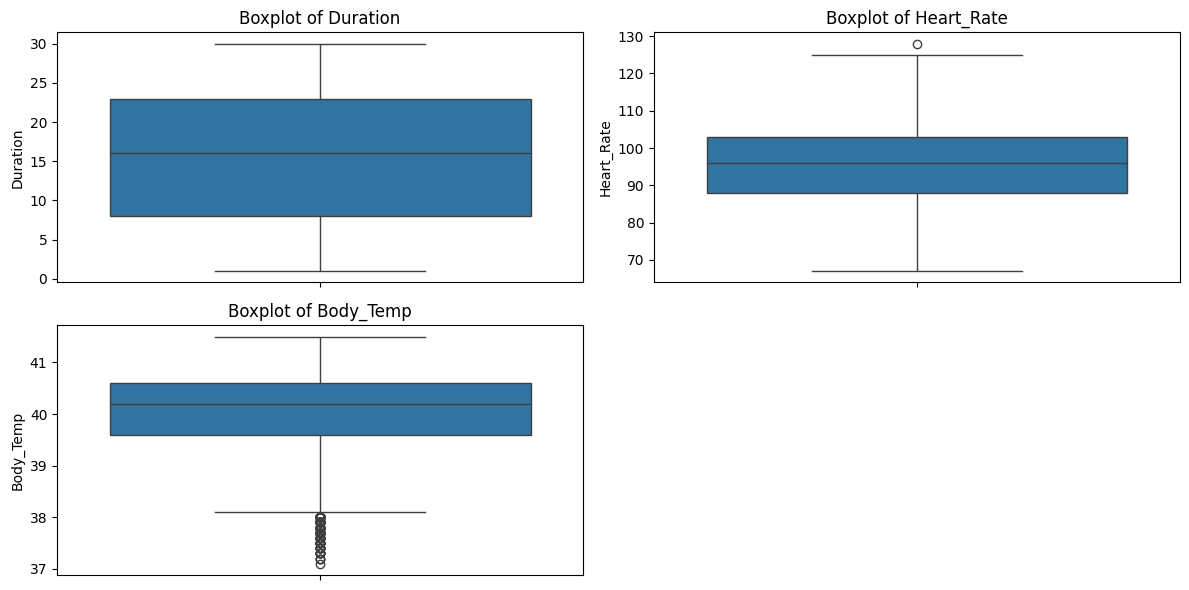

In [23]:
features = ['Duration', 'Heart_Rate', 'Body_Temp']

plt.figure(figsize=(12,6))
for i, col in enumerate(features, 1):
    plt.subplot(2,2,i)
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

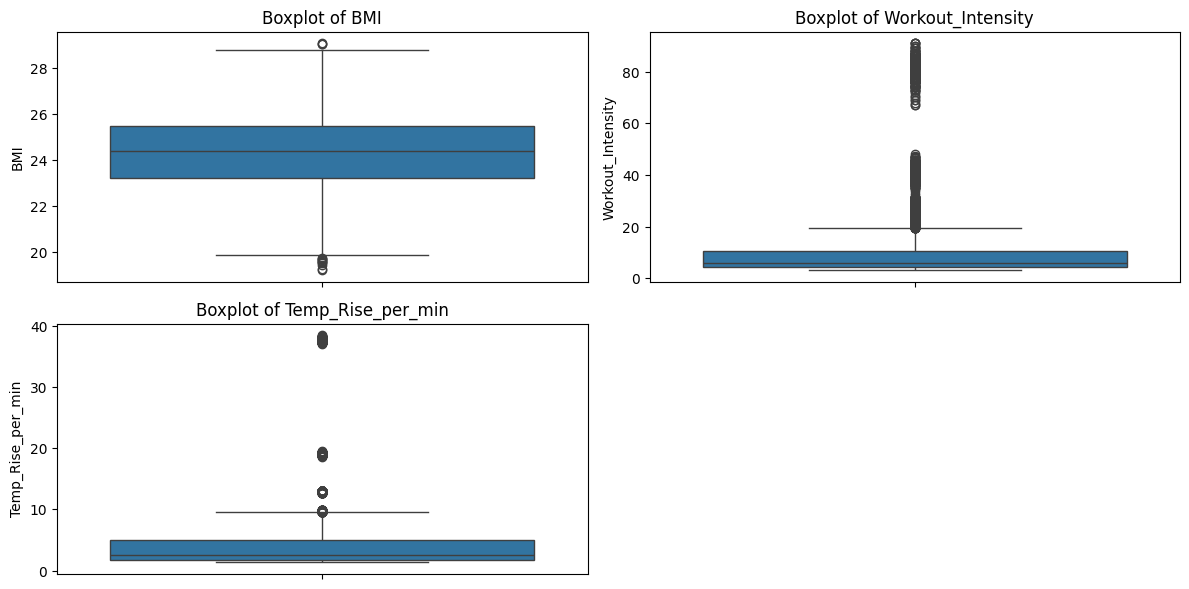

In [24]:
features = ['BMI',"Workout_Intensity",'Temp_Rise_per_min']

plt.figure(figsize=(12,6))
for i, col in enumerate(features, 1):
    plt.subplot(2,2,i)
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

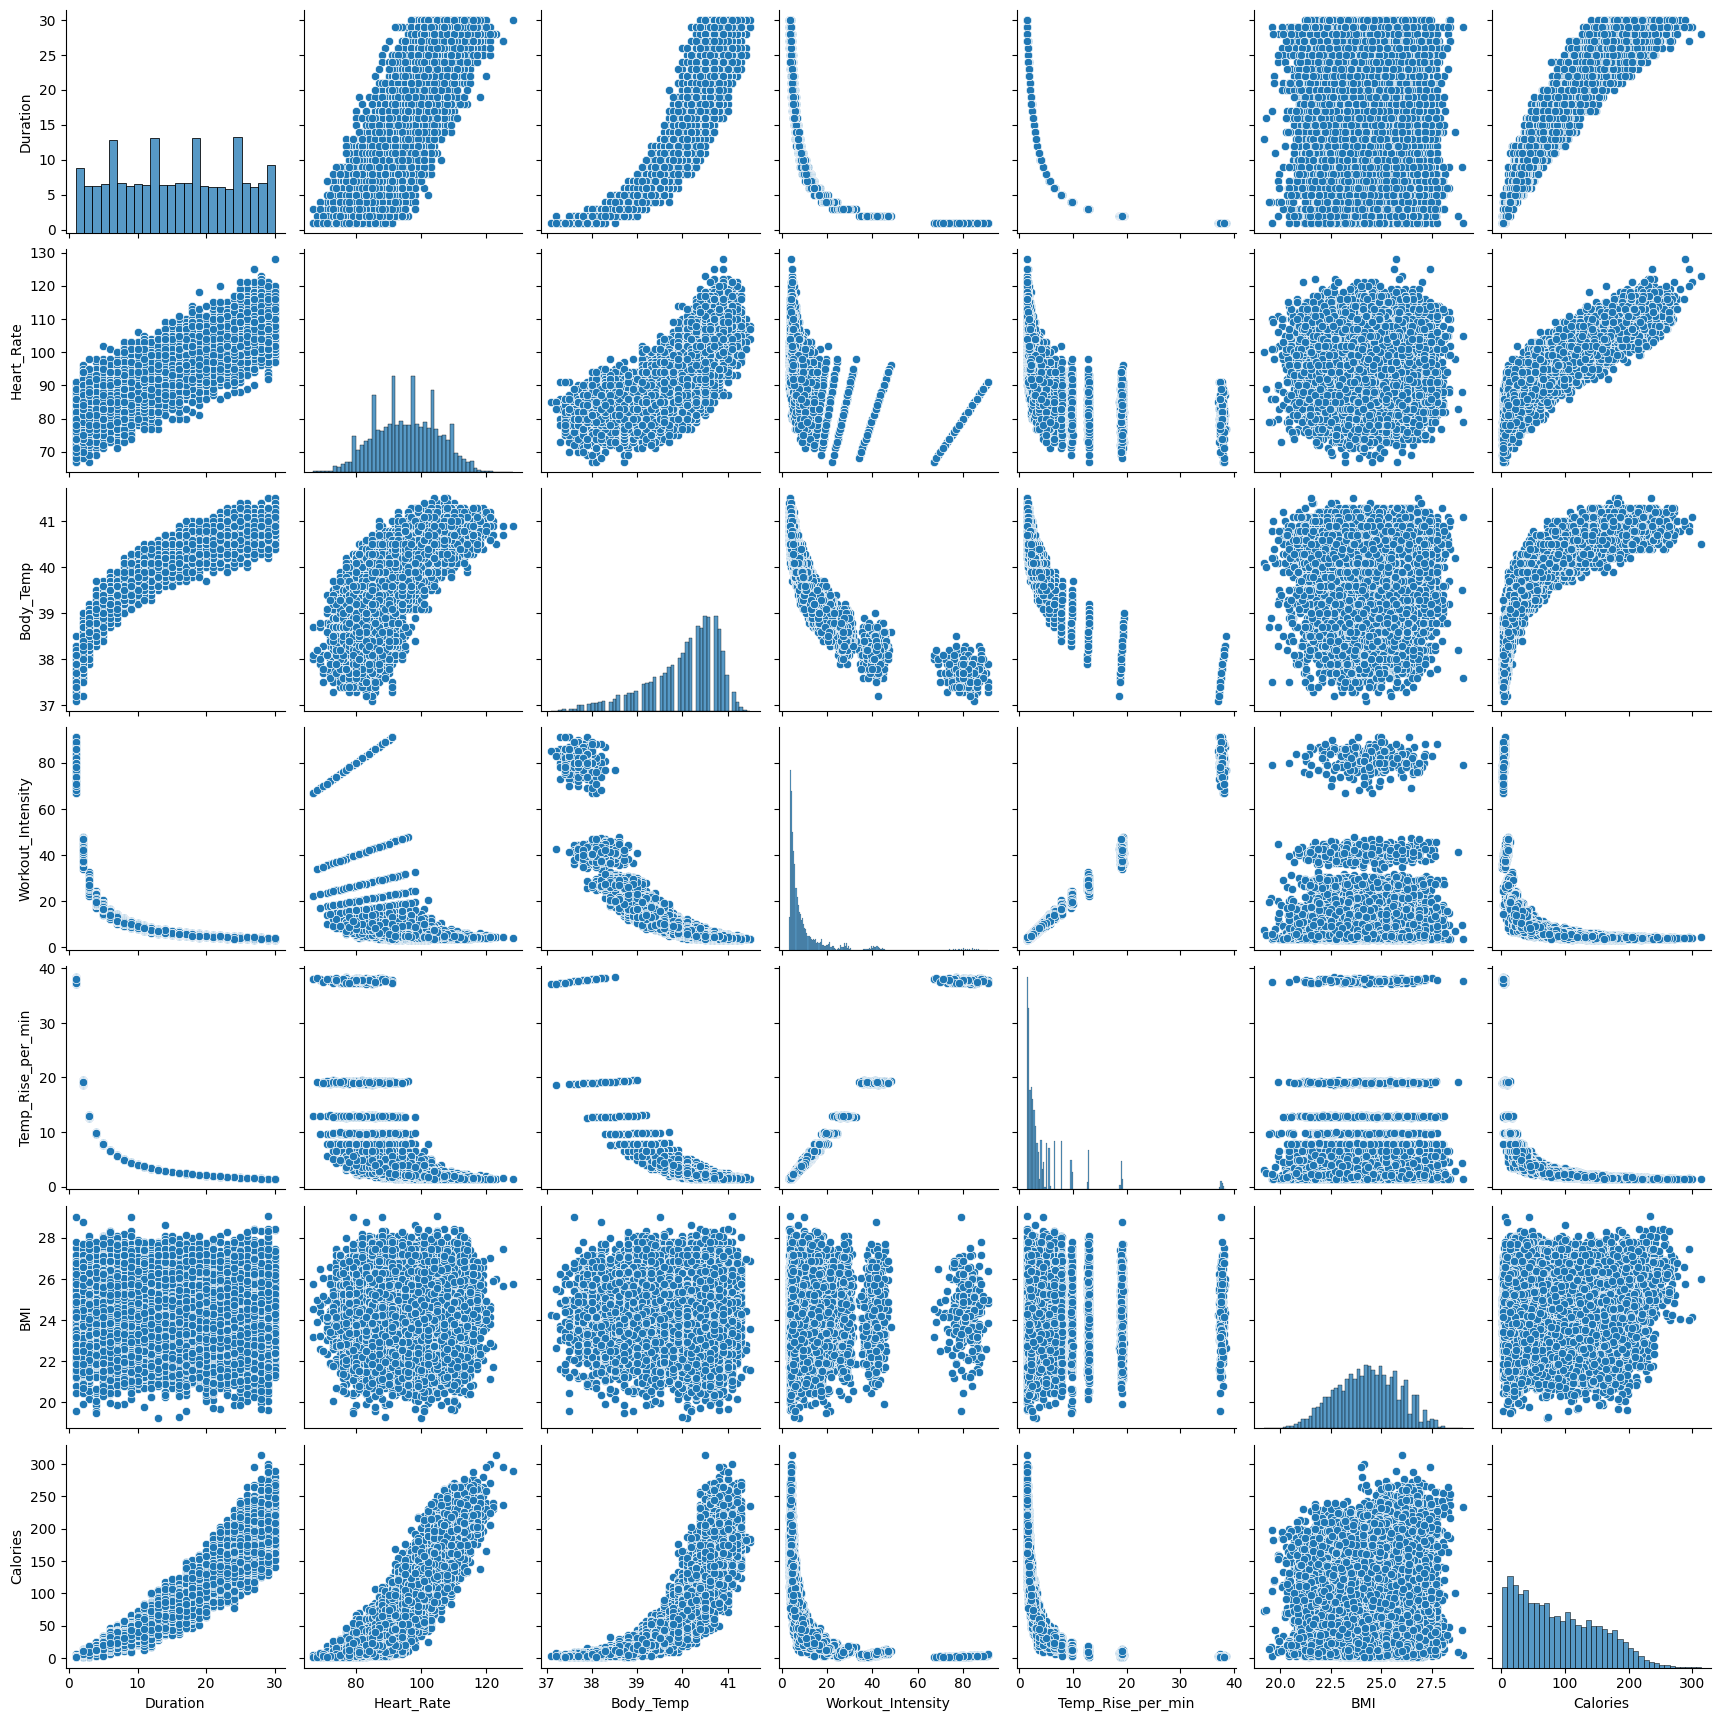

In [25]:
sns.pairplot(df[['Duration','Heart_Rate','Body_Temp',"Workout_Intensity",'Temp_Rise_per_min',"BMI",'Calories']])
plt.show()


### Modeling 

In [26]:
df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,BMI,Workout_Intensity,Temp_Rise_per_min
0,0,68,190.0,94.0,29.0,105.0,40.8,231.0,26.038781,3.620690,1.406897
1,1,20,166.0,60.0,14.0,94.0,40.3,66.0,21.773842,6.714286,2.878571
2,0,69,179.0,79.0,5.0,88.0,38.7,26.0,24.655910,17.600000,7.740000
3,1,34,179.0,71.0,13.0,100.0,40.5,71.0,22.159109,7.692308,3.115385
4,1,27,154.0,58.0,10.0,81.0,39.8,35.0,24.456063,8.100000,3.980000


In [27]:
df.drop(["Workout_Intensity","Temp_Rise_per_min","BMI"],axis=1)

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,1,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...
14995,1,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,1,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,1,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,0,78,193.0,97.0,2.0,84.0,38.3,11.0


In [28]:
X = df.drop('Calories', axis=1)
y = df['Calories']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
lr = LinearRegression()

In [30]:
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

In [31]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)  

y_pred_rf = rf.predict(X_test)


In [32]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(
)

gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

In [33]:
def evaluate(true, pred, model_name):
    mae = mean_absolute_error(true, pred)
    mse = mean_squared_error(true, pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, pred)

    print(f" {model_name} Performance")
    print(f"MAE:  {mae:.2f}")
    print(f"MSE:  {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²:   {r2:.4f}")
    print("-"*40)


Model Evaluation

In [34]:
evaluate(y_test, y_pred_lr, "Linear Regression")
evaluate(y_test, y_pred_rf, "Random Forest")
evaluate(y_test, y_pred_gbr, "Gradient Boosting")


 Linear Regression Performance
MAE:  7.44
MSE:  105.14
RMSE: 10.25
R²:   0.9739
----------------------------------------
 Random Forest Performance
MAE:  1.90
MSE:  8.56
RMSE: 2.93
R²:   0.9979
----------------------------------------
 Gradient Boosting Performance
MAE:  2.62
MSE:  12.94
RMSE: 3.60
R²:   0.9968
----------------------------------------


In [35]:
import joblib

# Save the trained model
joblib.dump(gbr, "model/calorie_gbr_model.pkl")
print("✅ Model saved successfully as calories_gbr_model.pkl")

✅ Model saved successfully as calories_gbr_model.pkl
